Cyna Shirazinejad, 7/7/21

# Notebook 15: analyze scission-present ARPC3+ CCPs, 'zero' padding

outline:
* comparison of lifetimes of ARPC3+/- CCPs
* comparison of aligned intensities of ARPC3+/- CCPs

##### import all necessary Python modules

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pickle
from IPython.display import Image
from scipy import signal
import scipy.stats as stats
import seaborn as sns

analysis_metadata = np.load('analysis_metadata.npy', allow_pickle=True)
sys.path.append(analysis_metadata.item().get('path_notebook')+'/cmeAnalysisPostProcessingSimplified') # add custom Python scripts to the local path
import generate_index_dictionary
import return_track_attributes
import display_tracks
index_dictionary = generate_index_dictionary.return_index_dictionary()

# load files

In [2]:
experiment = 'ada_hypotonic_after'

In [3]:
path_outputs = analysis_metadata.item().get('path_outputs')

In [4]:
ccps_arpc3_negative = np.load(path_outputs+'/dataframes/'+experiment+'_merged_arpc3_negative_ccps_non_peaked.npy', allow_pickle=True)
    
ccps_arpc3_positive = np.load(path_outputs+'/dataframes/'+experiment+'_merged_arpc3_positive_ccps_non_peaked.npy', allow_pickle=True)
    
ap2_lifetime_arpc3_negative = np.load(path_outputs+'/dataframes/'+experiment+'_ap2_lifetime_arpc3_negative_non_peaked.npy', allow_pickle=True)
ap2_lifetime_arpc3_positive = np.load(path_outputs+'/dataframes/'+experiment+'_ap2_lifetime_arpc3_positive_non_peaked.npy', allow_pickle=True)
arpc3_lifetime_arpc3_positive = np.load(path_outputs+'/dataframes/'+experiment+'_arpc3_lifetime_arpc3_positive_non_peaked.npy', allow_pickle=True)

fraction_arpc3_positive = np.load(path_outputs+'/dataframes/'+experiment+'_fraction_arpc3_positive_non_peaked.npy', allow_pickle=True)

# AP2 lifetimes of ARPC3+/- events

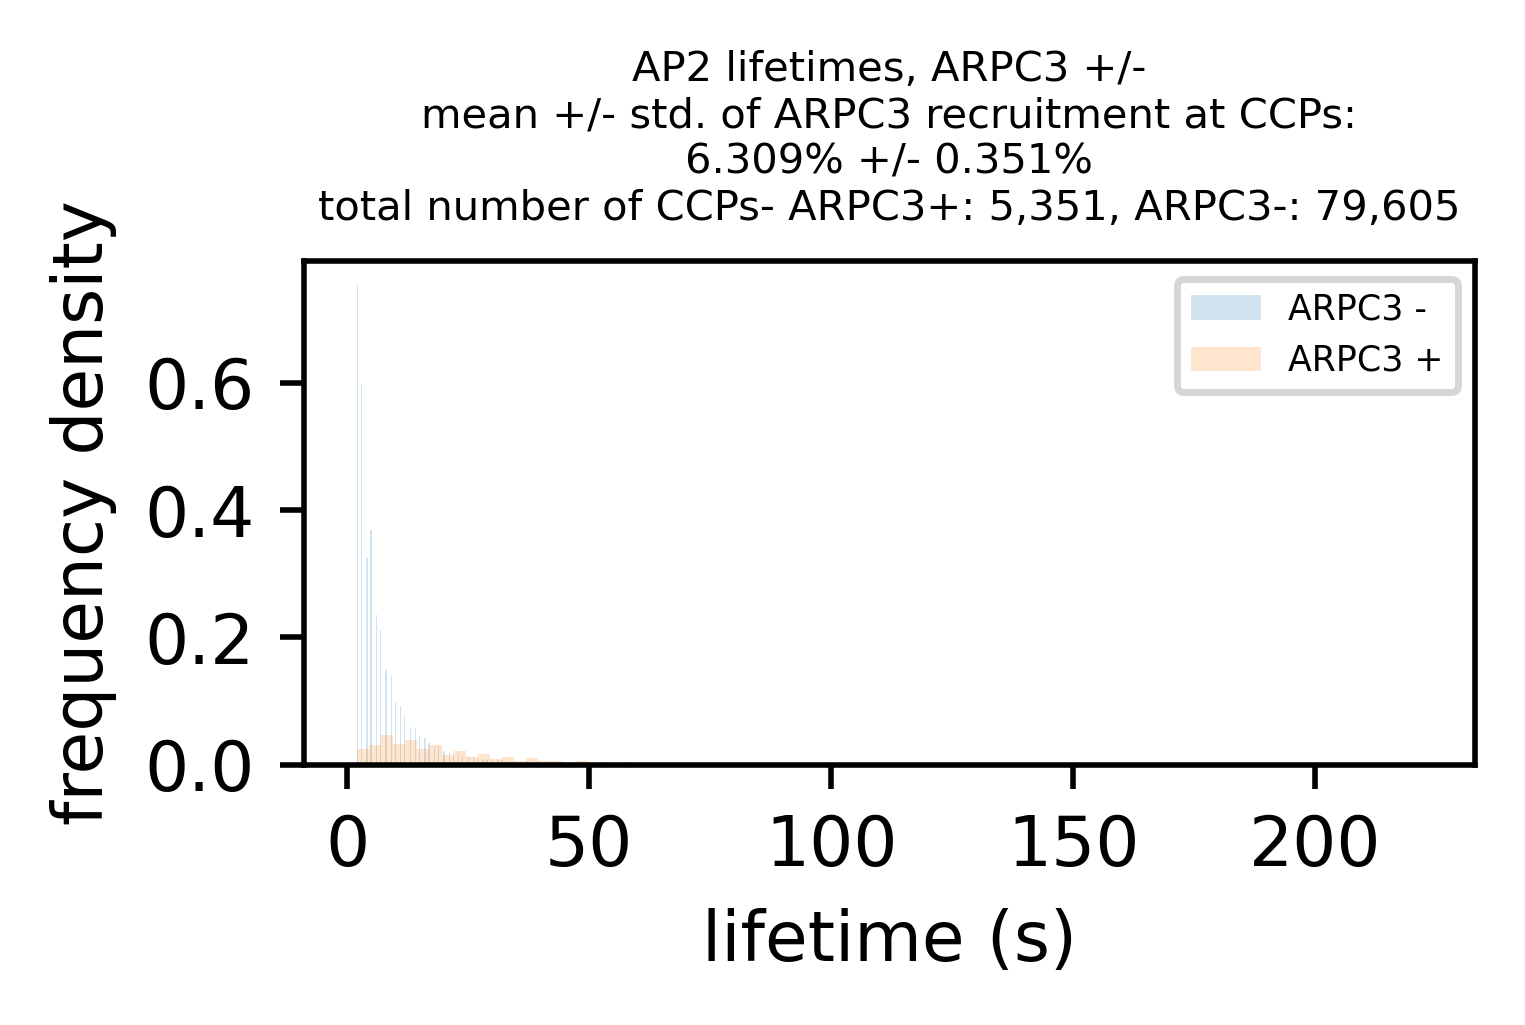

In [5]:
plt.rcParams['figure.dpi']=500
plt.rcParams['figure.figsize']=(3,2)
plt.hist(ap2_lifetime_arpc3_negative, alpha=0.2, label='ARPC3 -', bins='auto', density=True)
plt.hist(ap2_lifetime_arpc3_positive, alpha=0.2, label='ARPC3 +', bins='auto', density=True)
plt.rcParams.update({'font.size': 5})
plt.xlabel('lifetime (s)')
plt.ylabel('frequency density')
plt.title('AP2 lifetimes, ARPC3 +/-'+
          '\nmean +/- std. of ARPC3 recruitment at CCPs:\n' + 
          str(np.around(100*np.mean(fraction_arpc3_positive),3)) + '% +/- ' +
          str(np.around(100*np.std(fraction_arpc3_positive),3)) + '%' + 
          '\ntotal number of CCPs- ARPC3+: ' + "{:,}".format(len(ap2_lifetime_arpc3_positive)) + 
          ', ARPC3-: ' + "{:,}".format(len(ap2_lifetime_arpc3_negative)))
plt.legend()
plt.tight_layout()
# plt.savefig(unique_user_saved_outputs+'/plots/ap2lifetimes_plusminus_arpc3_histogram_density_sigdnm2peak_zeropadding.png')

# CCP lifetimes (AP2 initiation to DNM2 peak) of ARPC3+/- events

# histogram of ARPC3 lifetimes

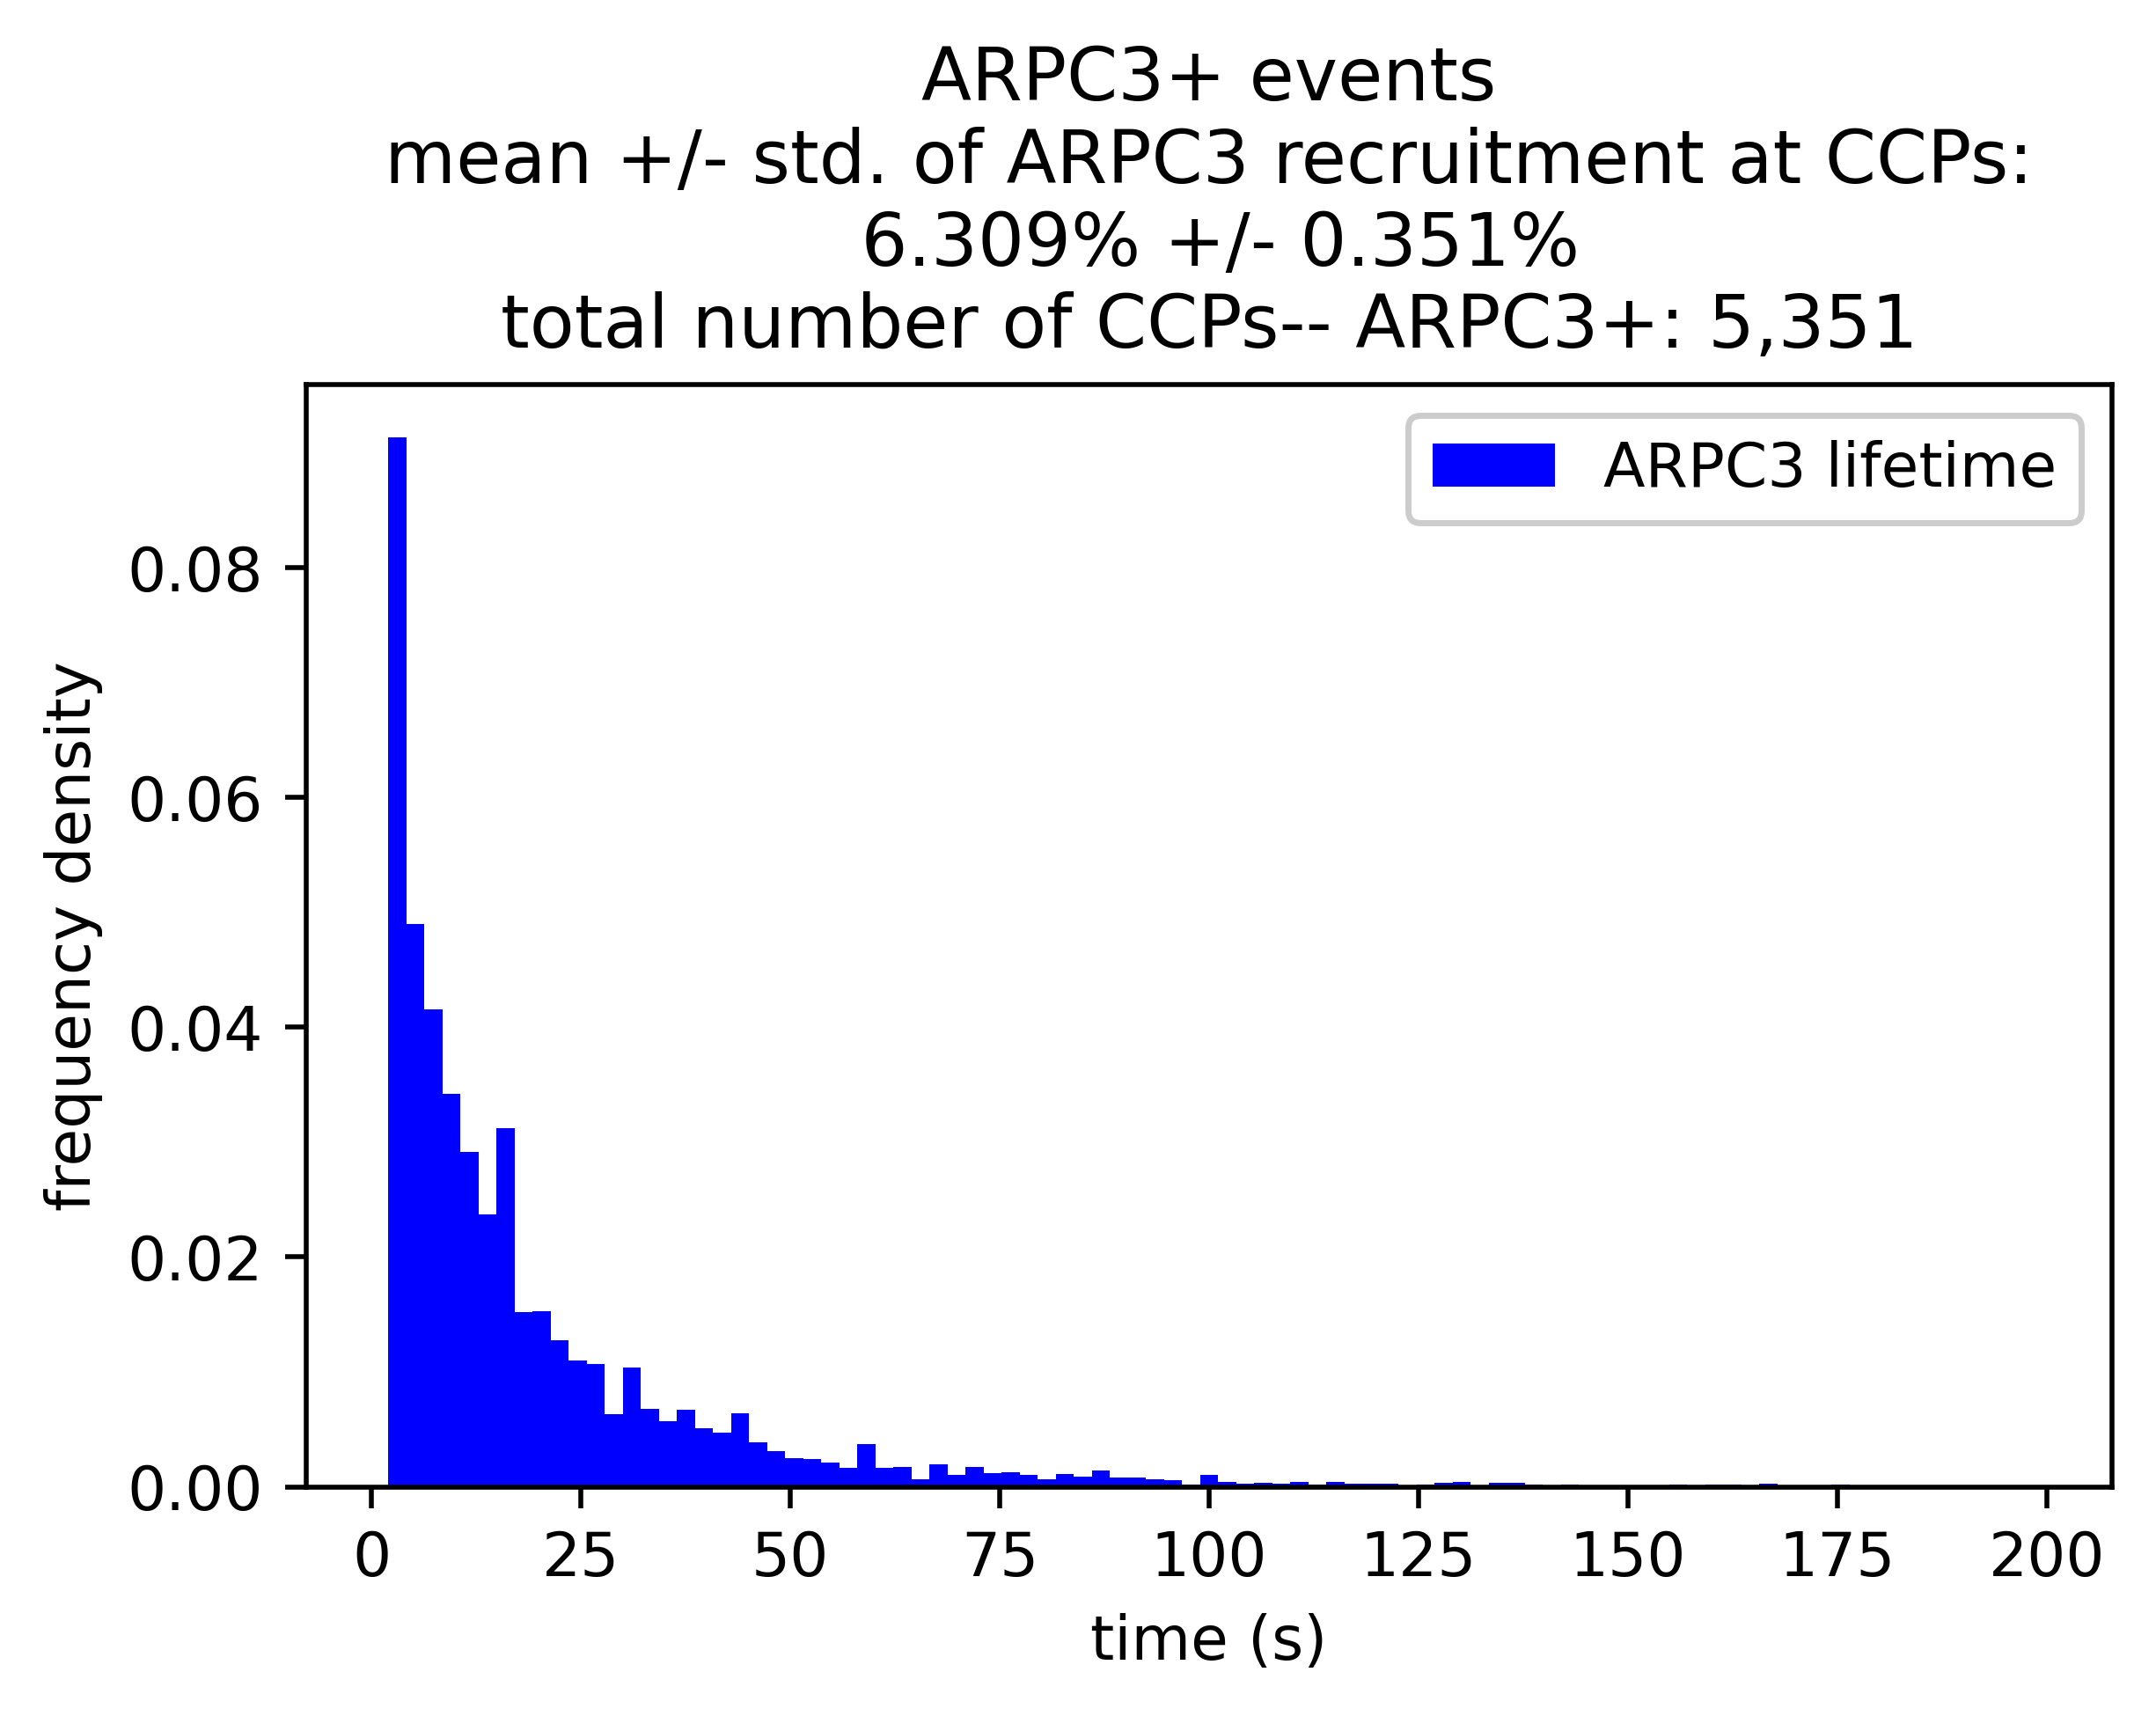

In [6]:
plt.style.use('default')

plt.rcParams["figure.dpi"]=500
plt.rcParams["figure.figsize"]=(5,4)

plt.hist(arpc3_lifetime_arpc3_positive,
         bins='auto',
         alpha=1,
         density=True,
         label='ARPC3 lifetime',
         color='blue')

plt.legend(loc='upper right', framealpha=1)
plt.xlabel('time (s)')
plt.ylabel('frequency density')
plt.title('ARPC3+ events'+
          '\nmean +/- std. of ARPC3 recruitment at CCPs:\n ' + 
          str(np.around(100*np.mean(fraction_arpc3_positive),3)) + '% +/- ' +
          str(np.around(100*np.std(fraction_arpc3_positive),3)) + '%' + 
          '\ntotal number of CCPs-- ARPC3+: ' + "{:,}".format(len(arpc3_lifetime_arpc3_positive)))
plt.tight_layout()
# plt.savefig(unique_user_saved_outputs+'/plots/fig_3c_arpc3_lifetimes_sigdnm2peak_zeropadding.png')

In [7]:
pd.DataFrame(arpc3_lifetime_arpc3_positive).describe()

,0
count,5351.000000
mean,19.715754
std,23.027820
min,2.000000
25%,5.000000
50%,12.000000
75%,24.000000
max,198.000000


# merge amplitudes of different channels

In [8]:
with open(path_outputs+'/dataframes/'+experiment+'_merged_ccp_attributes_non_peaked', 'rb') as f:
    merged_results = pickle.load(f)  

In [9]:
channel_amplitudes_arpc3_negative = []
for i in range(len(merged_results['ch0_vectors_arpc3_negative'])):
    channel_amplitudes_arpc3_negative.append([merged_results['ch0_vectors_arpc3_negative'][i],
                                              merged_results['ch1_vectors_arpc3_negative'][i],
                                              merged_results['channel_0_1_separations_arpc3_negative'][i]])

channel_amplitudes_arpc3_positive = []
for i in range(len(merged_results['ch0_vectors_arpc3_positive'])):
    channel_amplitudes_arpc3_positive.append([merged_results['ch0_vectors_arpc3_positive'][i],
                                              merged_results['ch1_vectors_arpc3_positive'][i],
                                              merged_results['ch2_vectors_arpc3_positive'][i],
                                              merged_results['channel_0_1_separations_arpc3_positive'][i],
                                              merged_results['channel_0_2_separations_arpc3_positive'][i],
                                              merged_results['channel_1_2_separations_arpc3_positive'][i]])
channel_amplitudes_arpc3_positive = np.array(channel_amplitudes_arpc3_positive)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


# cohort plots of ARPC3+ CCPs

[0, 40, 100, 180]


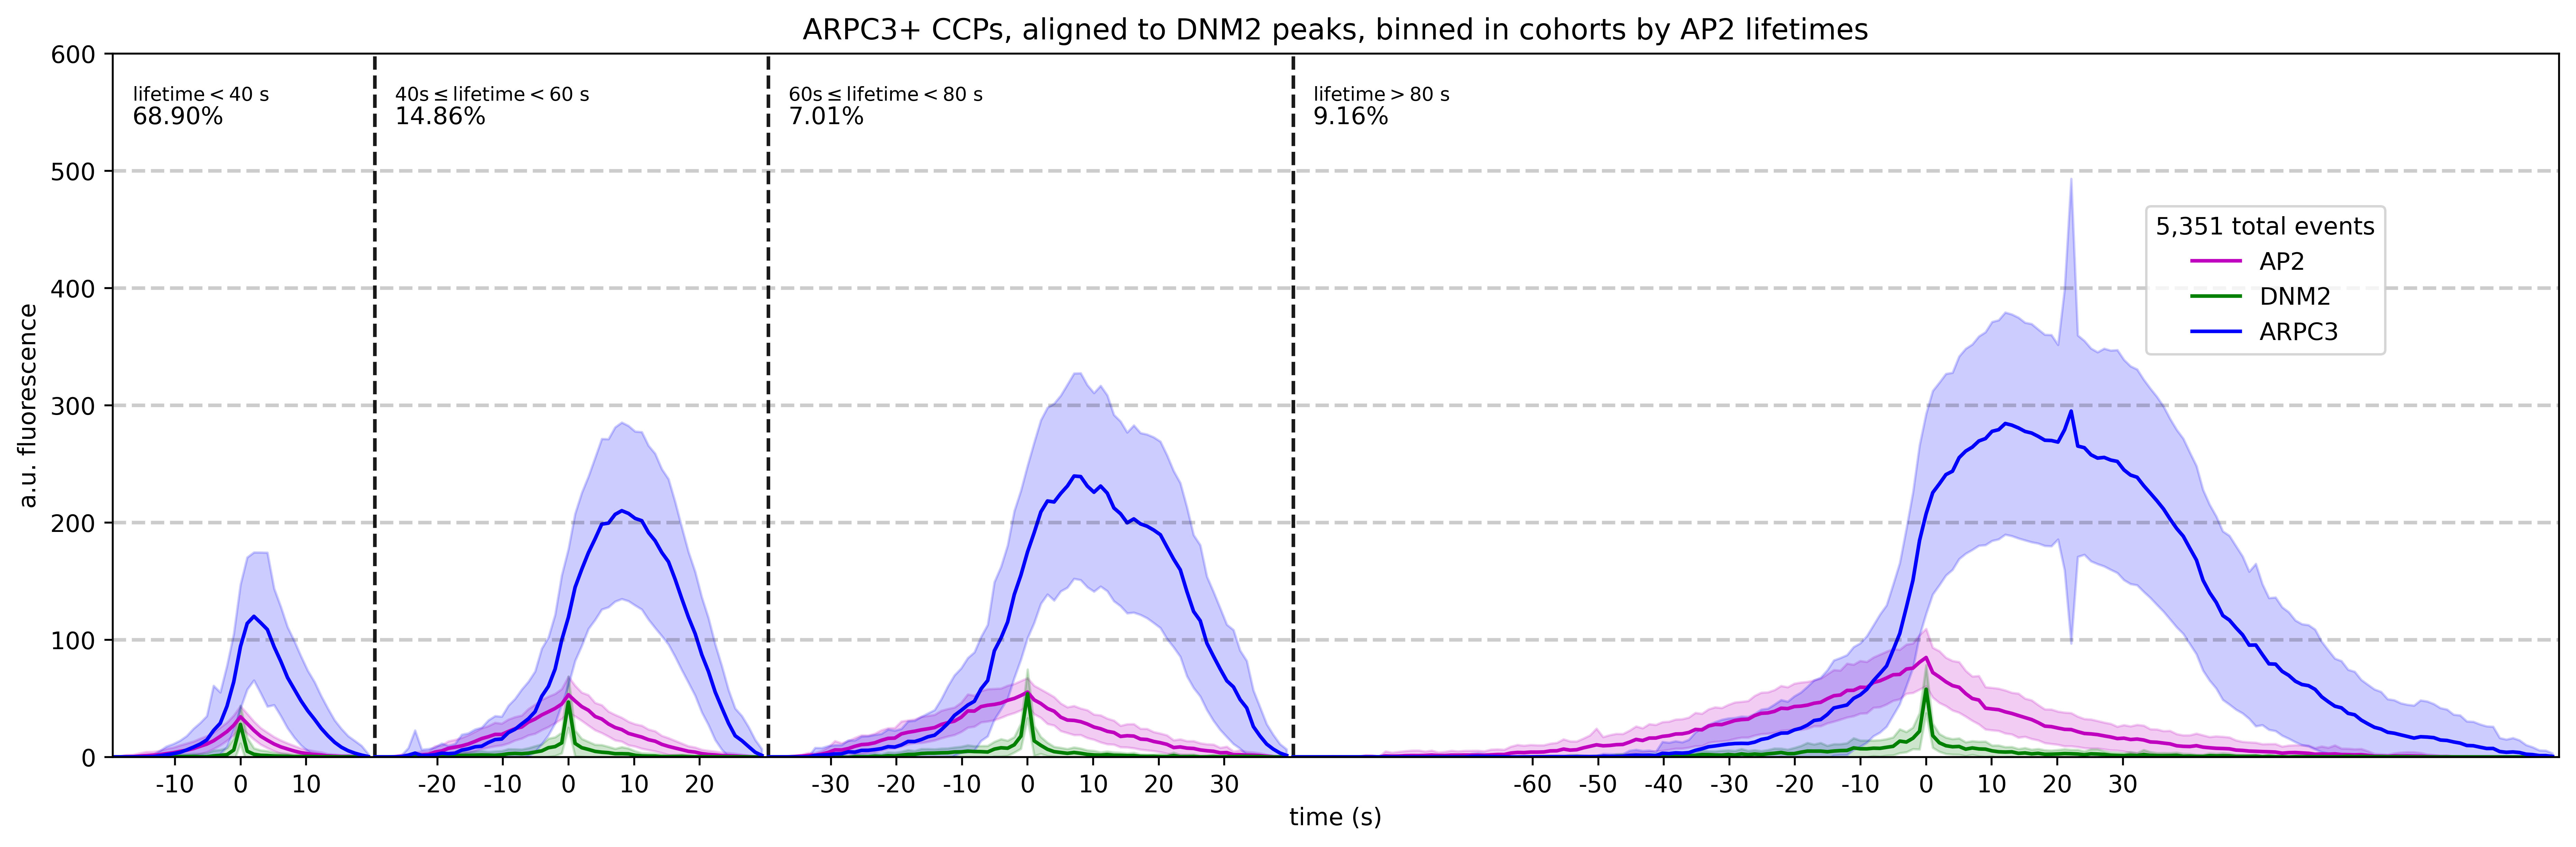

In [10]:
plt.style.use('default')

fig, axes = plt.subplots(1, 1, dpi=500, figsize=(15,5))
# axes_separation = axes.twinx()

cohorts = [[min(ap2_lifetime_arpc3_positive),40],[40,60],[60,80],[80,193]]

offsets, num_in_cohort, max_dnm2_cohort_indices = display_tracks.plot_separated_cohorts([axes], 
                                                                         channel_amplitudes_arpc3_positive, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [], 
                                                                         ['AP2', 'DNM2', 'ARPC3'],
                                                                         ['m', 'g', 'b'])

lines_0, labels_0 = axes.get_legend_handles_labels()
axes.legend(lines_0, labels_0, 
            loc='upper center', 
            bbox_to_anchor=(0.88, 0.8), 
            title="{:,}".format(len(channel_amplitudes_arpc3_positive)) + ' total events')

y_lines = np.arange(0,600,100)

for i in range(1,len(y_lines)):
    
    axes.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)

text_horizontal_shifts = 3
text_percentage_y = 540
text_bounds_y = 560

for i in range(len(cohorts)):

    if i==0:
        axes.text(text_horizontal_shifts, text_bounds_y, '$\mathregular{lifetime <}$'+str(cohorts[i][1])+' s', fontsize=8)
        axes.text(text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes_arpc3_positive)) + '%')
    elif i==len(cohorts)-1:
        axes.text(offsets[i]+text_horizontal_shifts, text_bounds_y, '$\mathregular{lifetime >}$'+str(cohorts[i][0])+' s', fontsize=8)
        axes.text(offsets[i]+text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes_arpc3_positive)) + '%')
    else:
        axes.text(offsets[i]+text_horizontal_shifts, text_bounds_y, str(cohorts[i][0])+'$\mathregular{s \leq lifetime <}$'+str(cohorts[i][1])+' s', fontsize=8)
        axes.text(offsets[i]+text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes_arpc3_positive)) + '%')
        
x_positions_ticks = []
x_labels_ticks = []
max_ticks_per_cohort = [[1, 1], [2, 2], [3, 3], [6, 3]]

for i in range(len(max_dnm2_cohort_indices)):
    

    num_ticks_before = np.min((int(np.floor((max_dnm2_cohort_indices[i])/10)),max_ticks_per_cohort[i][0]))
    num_ticks_after = np.min((int(np.ceil((cohorts[i][1]-max_dnm2_cohort_indices[i])/10)-1),max_ticks_per_cohort[i][1]))
    for j in range(num_ticks_before):
        
        x_labels_ticks.append(-10*(j+1))
        x_positions_ticks.append(-10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])
    
    x_labels_ticks.append(0)
    x_positions_ticks.append(offsets[i] + max_dnm2_cohort_indices[i])
    
    for j in range(num_ticks_after):
        
        x_labels_ticks.append(10*(j+1))
        x_positions_ticks.append(10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])


axes.set_xticks(0.5+np.array(x_positions_ticks), minor=False)
axes.set_xticklabels(x_labels_ticks, minor=False)


axes.set_xlabel('time (s)') 
axes.set_ylabel('a.u. fluorescence')
axes.set_title('ARPC3+ CCPs, aligned to DNM2 peaks, binned in cohorts by AP2 lifetimes')
axes.set_xlim([0,offsets[-1]+cohorts[-1][-1]])    
axes.set_ylim([0,600])  
# axes_separation.set_ylim([0,.3])
plt.tight_layout()   
# plt.savefig(unique_user_saved_outputs+'/plots/fig3ab_all_overlaid_ap2dnm2_arpc3plusccps_cohorts_centered_zero_sigdnm2peak_zeropadding.png')

# comparing ARPC3+/- aligned intensities with separations

In [11]:
%%capture
fig, (axes_0, axes_1) = plt.subplots(2, 1, dpi=500, figsize=(6,8), gridspec_kw=dict(height_ratios=[1,1]))

cohorts = [[min(ap2_lifetime_arpc3_negative), max(ap2_lifetime_arpc3_negative)]]

_, _, max_dnm2_cohort_indices_0 = display_tracks.plot_separated_cohorts([axes_0], 
                                                                         channel_amplitudes_arpc3_negative, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1], 
                                                                         [], 
                                                                         ['AP2', 'DNM2'],
                                                                         ['m', 'g'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], [], [], []],
                                                                         horizontal_shift_index=[0, 1], 
                                                                         horizontal_shift=[-92, -92, -92])

cohorts = [[min(ap2_lifetime_arpc3_positive), max(ap2_lifetime_arpc3_positive)]]


offsets, num_in_cohort, max_dnm2_cohort_indices_1 = display_tracks.plot_separated_cohorts([axes_1], 
                                                                         channel_amplitudes_arpc3_positive, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [], 
                                                                         ['AP2', 'DNM2', 'ARPC3'],
                                                                         ['m', 'g', 'b'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], []],
                                                                         horizontal_shift_index=[0, 1, 2], 
                                                                         horizontal_shift=[-90, -90, -90])                                                                           

shift_0 = max_dnm2_cohort_indices_0[0]
shift_1 = max_dnm2_cohort_indices_1[0]

[0]
[0]


Text(0.5, 1.0, 'cohorts of ARPC3+/- events')

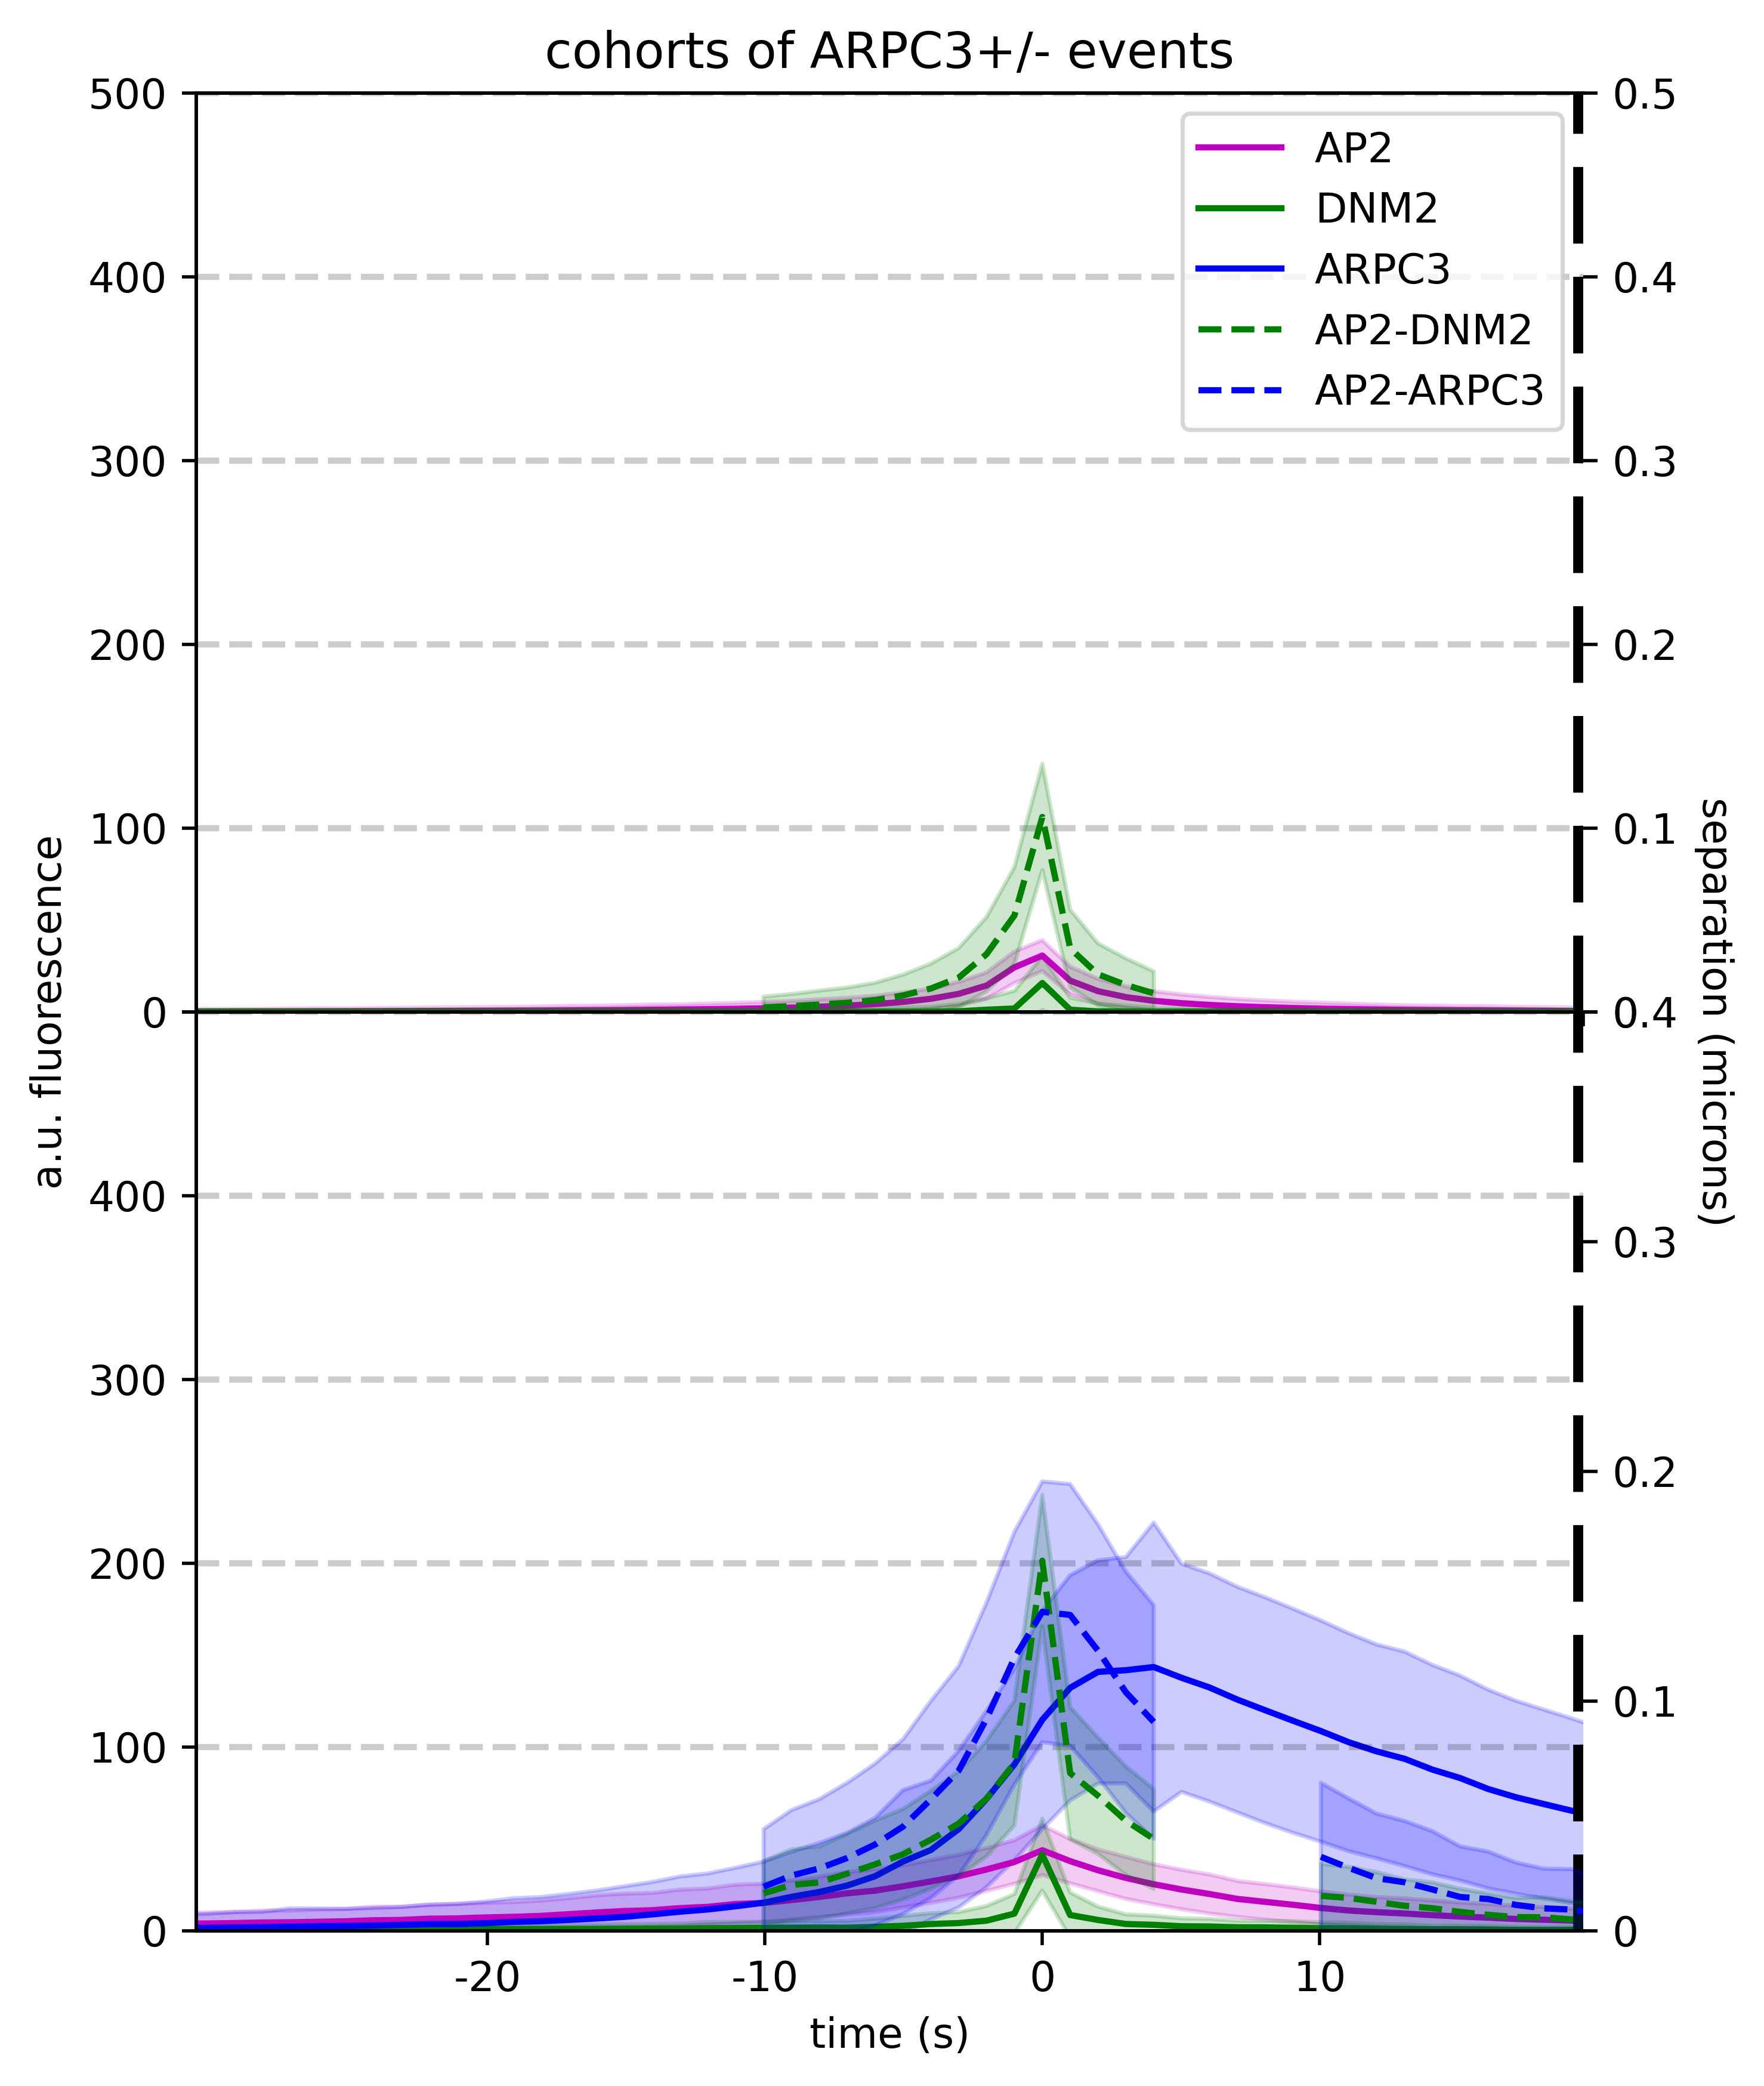

In [12]:
# %%capture

plt.style.use('default')
plt.rcParams['axes.spines.right'] = False

fig, (axes_0, axes_1) = plt.subplots(2, 1, dpi=500, figsize=(6,8), gridspec_kw=dict(height_ratios=[1,1]))
axes_separation_0 = axes_0.twinx()
axes_separation_1 = axes_1.twinx()




cohorts = [[min(ap2_lifetime_arpc3_negative), max(ap2_lifetime_arpc3_negative)]]

offsets, num_in_cohort, max_dnm2_cohort_indices_0 = display_tracks.plot_separated_cohorts([axes_0, axes_separation_0], 
                                                                         channel_amplitudes_arpc3_negative, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1], 
                                                                         [2], 
                                                                         ['AP2', 'DNM2', 'AP2-DNM2'],
                                                                         ['m', 'g', 'g'],
                                                                         line_cutoff_index=[2],
                                                                         line_cutoff_regions=[[], [], [[0, shift_0-10], [shift_0+5, 120]]],
                                                                         horizontal_shift_index=[0, 1, 2, 3, 4], 
                                                                         horizontal_shift=[-shift_0, -shift_0, -shift_0, -shift_0, -shift_0])                                                                           


cohorts = [[min(ap2_lifetime_arpc3_positive), max(ap2_lifetime_arpc3_positive)]]

_, _, max_dnm2_cohort_indices_1 = display_tracks.plot_separated_cohorts([axes_1, axes_separation_1], 
                                                                         channel_amplitudes_arpc3_positive, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [3, 4], 
                                                                         ['AP2', 'DNM2', 'ARPC3', 'AP2-DNM2', 'AP2-ARPC3'],
                                                                         ['m', 'g', 'b', 'g', 'b'],
                                                                         line_cutoff_index=[3, 4],
                                                                         line_cutoff_regions=[[], [], [], [[0, shift_1-10], [shift_1+5, 120]], [[0, shift_1-10], [shift_1+5, 120]]],
                                                                         horizontal_shift_index=[0, 1, 2, 3, 4], 
                                                                         horizontal_shift=[-shift_1, -shift_1, -shift_1, -shift_1, -shift_1])


lines_0, labels_0 = axes_1.get_legend_handles_labels()
lines_1, labels_1 = axes_separation_1.get_legend_handles_labels()

axes_0.legend(lines_0+lines_1, labels_0+labels_1, 
            loc='upper right')

y_lines = np.arange(0,600,100)

for i in range(1,len(y_lines)):
    
    axes_0.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)
    axes_1.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)

axes_1.set_xlabel('time (s)') 
axes_0.set_xlim([-30, 20]) 
axes_1.set_xlim([-30, 20]) 
axes_0.set_ylim([0,300])
axes_1.set_ylim([0,300])
axes_separation_0.set_ylim([0,0.2])
axes_separation_1.set_ylim([0,0.2])

axes_1.set_yticks([0,100,200,300,400, 500], minor=False)
axes_1.set_yticklabels([0,100,200,300, 400, 500], minor=False)
axes_0.set_yticks([0,100,200,300,400, 500], minor=False)
axes_0.set_yticklabels([0,100,200,300,400, 500], minor=False)

axes_separation_1.set_yticks([0, 0.1, 0.2, 0.3, 0.4], minor=False)
axes_separation_1.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4], minor=False)
axes_separation_0.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5], minor=False)
axes_separation_0.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5], minor=False)

plt.setp(axes_0.get_xticklabels(), visible=False)
yticks = axes_1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
plt.subplots_adjust(hspace=.0)

axes_0.axvline(20, color='black', linewidth=5, linestyle='--')
axes_1.axvline(20, color='black', linewidth=5, linestyle='--')

axes_0.text(-36,0, 'a.u. fluorescence', rotation="vertical", va="center", fontsize=10);
axes_0.text(24,0, 'separation (microns)', rotation=270, va="center", fontsize=10);

axes_1.set_xticks(0.5+np.array([-20, -10, 0, 10]), minor=False)
axes_1.set_xticklabels([-20, -10, 0, 10], minor=False)

axes_0.set_title('cohorts of ARPC3+/- events')

# plt.savefig('/Users/cynashirazinejad/Desktop/wildtype.png')